## Gold Price prediction using Linear Regression
- Machine Learning linear regression model that takes information from the past Gold ETF (GLD) prices and returns a prediction of the Gold ETF price the next day.


- GLD is the largest ETF to invest directly in physical gold. (source: http://www.etf.com/GLD)


### Gold mutual funds are of two types 
- gold exchange traded funds (ETF) and gold savings funds. As the name suggests, gold ETFs are mutual fund schemes that invest in gold and are listed on the stock exchanges. This is done to mimic the price performance of the physical form of gold.





#### *Import the libraries and read the Gold ETF data*

In [ ]:
#LinearRegression is a machine learing library for linear regression
from sklearn.linear_model import LinearRegression

In [ ]:
#pandas and numpy are used for data manipulation
import pandas as pd
import numpy as np

In [ ]:
#matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [ ]:
pip install fix-yahoo-finance

In [ ]:
#fix yahoo finance is used to fetch data
import fix_yahoo_finance as fyf

In [ ]:
pip install yfinance

     |████████████████████████████████| 5.5MB 11.4MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=04663e1bcbd5dc4dc64bccfb7a0952149c04e36ce6e5526762b2a96dad231b00
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
#yahoo finance is used to fetch data
import yfinance as yf

#### *Reading the data*
- Now, we are going to read the past 12 years of daily Gold ETF price data and store it in Df. 
- After that we remove the colums which are not relevant and drop NaN values using dropna() function. 
- Then after that, we plot the Gold ETF close price.

In [ ]:
#Read data
Df = yf.download('GLD', '2008-01-01', '2021-01-13', auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
#Only keep close colums
Df = Df[['Close']]

In [ ]:
#Drop rows with missing values
Df = Df.dropna()

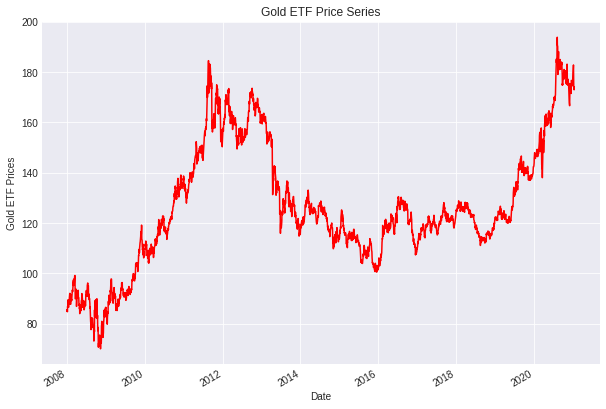

In [ ]:
#Plot the closing price of GLD
Df.Close.plot(figsize=(10, 7), color='r')
plt.ylabel("Gold ETF Prices")
plt.title("Gold ETF Price Series")
plt.show()

#### *Define: Explanatory Variables*
- An explanatory variable is a variable that is manipulated to determine the value of the Gold ETF price the next day. - Simply, they are the features which we want to use to predict the Gold ETF price. 
- The explanatory variables in this strategy are the moving averages for past 3 days and 9 days. 
- We drop the NaN values using dropna() function and store the feature variables in X.
- However, you can add more variables to X which you think are useful to predict the prices of the Gold ETF. 
- These variables can be technical indicators, the price of another ETF such as Gold miners ETF (GDX) or Oil ETF (USO), or US economic data.



In [ ]:
Df['S_3'] = Df['Close'].rolling(window=3).mean()
Df['S_9'] = Df['Close'].rolling(window=9).mean()
Df['next_day_price'] = Df['Close'].shift(-1)

In [ ]:
Df = Df.dropna()
X = Df[['S_3', 'S_9']]

#### *Define: Dependent Variable*
- Similarly, the dependent variable depends on the values of the explanatory variables. 
- Simply put, it is the Gold ETF price which we are trying to predict. 
- We store the Gold ETF price in y.

In [ ]:
y = Df['next_day_price']

#### *Split the data into train and test dataset*
- In this step, we split the predictors and output data into train and test data. 
- The training data is used to create the linear regression model, by pairing the input with expected output. 
- The test data is used to estimate how well the model has been trained.

1. First 80% of the data is used for training and remaining data for testing
2. X_train & y_train are training dataset
3. X_test & y_test are test dataset

In [ ]:
# Split the data into train and test dataset
t = .8
t = int(t*len(Df))

In [ ]:
# Train dataset
X_train = X[:t]
y_train = y[:t]

In [ ]:
# Test dataset
X_test = X[t:]
y_test = y[t:]

#### *Create a linear regression model*
- We will now create a linear regression model. But, what is linear regression?

- If we try to capture a mathematical relationship between ‘x’ and ‘y’ variables that “best” explains the observed values of ‘y’ in terms of observed values of ‘x’ by fitting a line through a scatter plots then such an equation between x and y is called linear regression analysis.

- To break it down further, regression explains the variation in a dependent variable in terms of independent variables. 
- The dependent variable - ‘y’ is the variable that you want to predict. 
- The independent variables - ‘x’ are the explanatory variables that you use to predict the dependent variable. 
- The following regression equation describes that relation:

*Y = m1 * X1 + m2 * X2 + C 
Gold ETF price = m1 * 3 days moving average + m2 * 15 days moving average + c*

- Then we use the fit method to fit the independent and dependent variables (x’s and y’s) to generate coefficient and constant for regression.

In [ ]:
# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)
print("Linear Regression model")
print("Gold ETF Price (y) = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 9 Days Moving Average (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

Linear Regression model
Gold ETF Price (y) = 1.20 * 3 Days Moving Average (x1) + -0.21 * 9 Days Moving Average (x2) + 0.44 (constant)


#### *Predict the Gold ETF prices*
- Now, it’s time to check if the model works in the test dataset. 
- We predict the Gold ETF prices using the linear model created using the train dataset. 
- The predict method finds the Gold ETF price (y) for the given explanatory variable X.

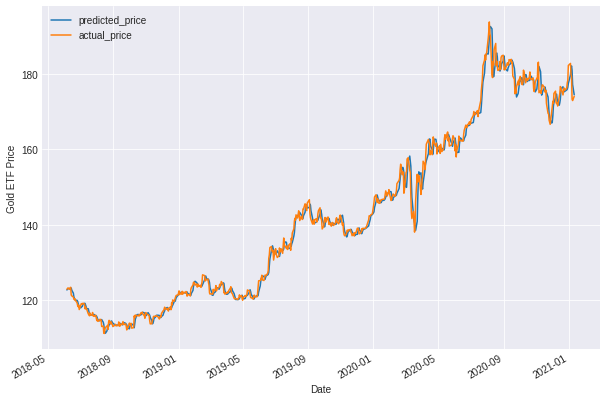

In [ ]:
# Predicting the Gold ETF prices
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold ETF Price")
plt.show()

- The graph shows the predicted and actual price of the Gold ETF.



#### *Goodness of the fit using the score() function.*

In [ ]:
# R square
r2_score = linear.score(X[t:], y[t:])*100
float("{0:.2f}".format(r2_score))

99.32

- As it can be seen, the R-squared of the model is 99.34%. 
- R-squared is always between 0 and 100%.
- A score close to 100% indicates that the model explains the Gold ETF prices well.

#### *Plotting cumulative returns*
- Let’s calculate the cumulative returns of this strategy to analyse its performance.
1. The steps to calculate the cumulative returns are as follows:
2. Generate daily percentage change of gold price
3. Create a buy trading signal represented by “1” when the next day’s predicted price is more than the current day predicted price. No position is taken otherwise
4. Calculate the strategy returns by multiplying the daily percentage change with the trading signal.
5. Finally, we will plot the cumulative returns graph

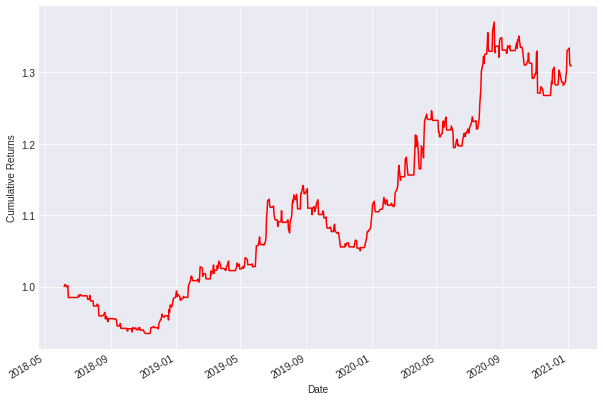

In [ ]:
gold = pd.DataFrame()

gold['price'] = Df[t:]['Close']
gold['predicted_price_next_day'] = predicted_price
gold['actual_price_next_day'] = y_test
gold['gold_returns'] = gold['price'].pct_change().shift(-1)

gold['signal'] = np.where(gold.predicted_price_next_day.shift(1) < gold.predicted_price_next_day,1,0)

gold['strategy_returns'] = gold.signal * gold['gold_returns']
((gold['strategy_returns']+1).cumprod()).plot(figsize=(10,7),color='r')
plt.ylabel('Cumulative Returns')
plt.show()

- We will also calculate the Sharpe ratio.



In [ ]:
'Sharpe Ratio %.2f' % (gold['strategy_returns'].mean()/gold['strategy_returns'].std()*(252**0.5))


'Sharpe Ratio 1.03'

#### *How to use this model to predict daily moves?*
- We can use the following code to predict the gold prices and give a trading signal whether we should buy GLD or take no position.

In [ ]:
data = yf.download('GLD', '2008-01-01', '2021-01-13', auto_adjust=True)
data['S_3'] = data['Close'].rolling(window=3).mean()
data['S_9'] = data['Close'].rolling(window=9).mean()
data = data.dropna()
data['predicted_gold_price'] = linear.predict(data[['S_3', 'S_9']])
data['signal'] = np.where(data.predicted_gold_price.shift(1) < data.predicted_gold_price,"Buy","No Position")
data.tail(7)

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Open,High,Low,Close,Volume,S_3,S_9,predicted_gold_price,signal
Date,,,,,,,,,
2021-01-04,181.970001,182.399994,180.960007,182.330002,14331400,179.463333,176.980003,179.797857,Buy
2021-01-05,182.869995,183.210007,181.820007,182.869995,12718800,181.186666,177.756668,181.710091,Buy
2021-01-06,181.490005,181.580002,178.240005,179.899994,18453500,181.699997,178.357778,182.203610,Buy
2021-01-07,179.690002,179.919998,178.839996,179.479996,7110200,180.749995,178.783334,180.973825,No Position
2021-01-08,176.830002,176.990005,171.479996,173.339996,24399900,177.573329,178.448888,177.223201,No Position
2021-01-11,172.139999,173.679993,172.029999,173.000000,8579200,175.273331,178.147776,174.519773,No Position
2021-01-12,173.130005,174.179993,172.320007,174.119995,9780800,173.486664,177.899997,172.422571,No Position


# COMPLETED